In [26]:
import pandas as pd
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [7]:
?pd.read_csv

In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/SushantKafle/DBSCAN/master/data/abc.csv", 
            header = None, names = ["x", "y", "cl"])
df

,x,y,cl
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


<AxesSubplot:xlabel='x', ylabel='y'>

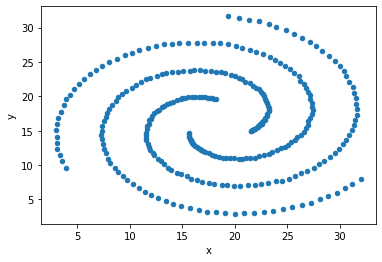

In [15]:
df.plot.scatter("x", "y")

In [17]:
X = df[["x", "y"]].values
X

array([[31.95,  7.95],
       [31.15,  7.3 ],
       [30.45,  6.65],
       [29.7 ,  6.  ],
       [28.9 ,  5.55],
       [28.05,  5.  ],
       [27.2 ,  4.55],
       [26.35,  4.15],
       [25.4 ,  3.85],
       [24.6 ,  3.6 ],
       [23.6 ,  3.3 ],
       [22.75,  3.15],
       [21.85,  3.05],
       [20.9 ,  3.  ],
       [20.  ,  2.9 ],
       [19.1 ,  3.  ],
       [18.2 ,  3.2 ],
       [17.3 ,  3.25],
       [16.55,  3.5 ],
       [15.7 ,  3.7 ],
       [14.85,  4.1 ],
       [14.15,  4.4 ],
       [13.4 ,  4.75],
       [12.7 ,  5.2 ],
       [12.05,  5.65],
       [11.45,  6.15],
       [10.9 ,  6.65],
       [10.3 ,  7.25],
       [ 9.7 ,  7.85],
       [ 9.35,  8.35],
       [ 8.9 ,  9.05],
       [ 8.55,  9.65],
       [ 8.15, 10.35],
       [ 7.95, 10.95],
       [ 7.75, 11.7 ],
       [ 7.55, 12.35],
       [ 7.45, 13.  ],
       [ 7.35, 13.75],
       [ 7.3 , 14.35],
       [ 7.35, 14.95],
       [ 7.35, 15.75],
       [ 7.55, 16.35],
       [ 7.7 , 16.95],
       [ 7.

In [19]:
X_scaled = scale(X)

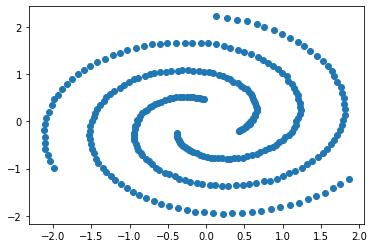

In [29]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])

In [31]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

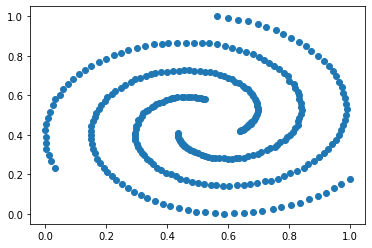

In [32]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])

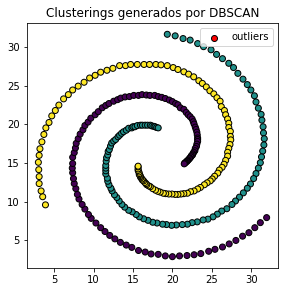

In [46]:
# Modelo
modelo_dbscan = DBSCAN(
                    eps          = .1,
                    min_samples  = 2,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(X=X_scaled)
# Clasificación
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');